In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [34]:
df=pd.read_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\final.csv')
df.head()

,gender,age,income,purchase
0,1,30,400,Hardware
1,0,31,350,Skincare
2,1,40,450,Home
3,0,26,180,groceries
4,1,38,200,groceries


In [ ]:
# scaler = StandardScaler()
# df[['income']] = scaler.fit_transform(df[[ 'income']])

In [ ]:
# df.head()

,gender,age,income,purchase
0,1,-0.328084,0.994821,Hardware
1,0,-0.206738,0.553332,Skincare
2,1,0.885378,1.436309,Home
3,0,-0.813469,-0.947729,groceries
4,1,0.642685,-0.771133,groceries


In [35]:
high_spending = ['Hardware', 'Skincare']
low_spending = ['groceries', 'Home']

In [36]:
df['spending_level'] = df['purchase'].apply(lambda x: 1 if x in high_spending else 0)

In [37]:
df.head()

,gender,age,income,purchase,spending_level
0,1,30,400,Hardware,1
1,0,31,350,Skincare,1
2,1,40,450,Home,0
3,0,26,180,groceries,0
4,1,38,200,groceries,0


In [38]:
df1=df.drop(['purchase'],axis=1)
df1.head()

,gender,age,income,spending_level
0,1,30,400,1
1,0,31,350,1
2,1,40,450,0
3,0,26,180,0
4,1,38,200,0


In [39]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [40]:
labels = kmeans.labels_
labels

array([0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2,
       1, 0, 1, 2, 2])

In [41]:
df['cluster'] = labels

In [42]:
sse = []
silhouette_avg = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df1)
    sse.append(kmeans.inertia_)
    score = silhouette_score(df1, labels)
    silhouette_avg.append(score)

d:\YT\YTpaper\insiderinformedcyber\GPU\myenv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\YT\YTpaper\insiderinformedcyber\GPU\myenv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\YT\YTpaper\insiderinformedcyber\GPU\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\YT\YTpaper\insiderinformedcyber\GPU\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


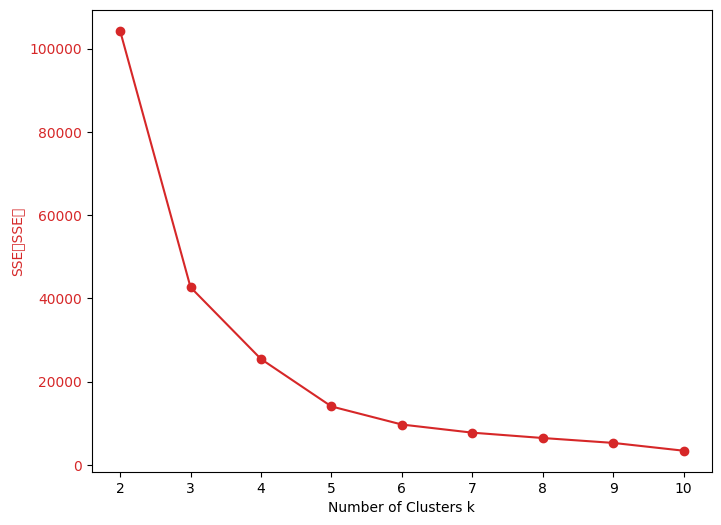

In [43]:
fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Clusters k')
ax1.set_ylabel('SSE（SSE）', color=color)
ax1.plot(k_range, sse, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(k_range)



In [44]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

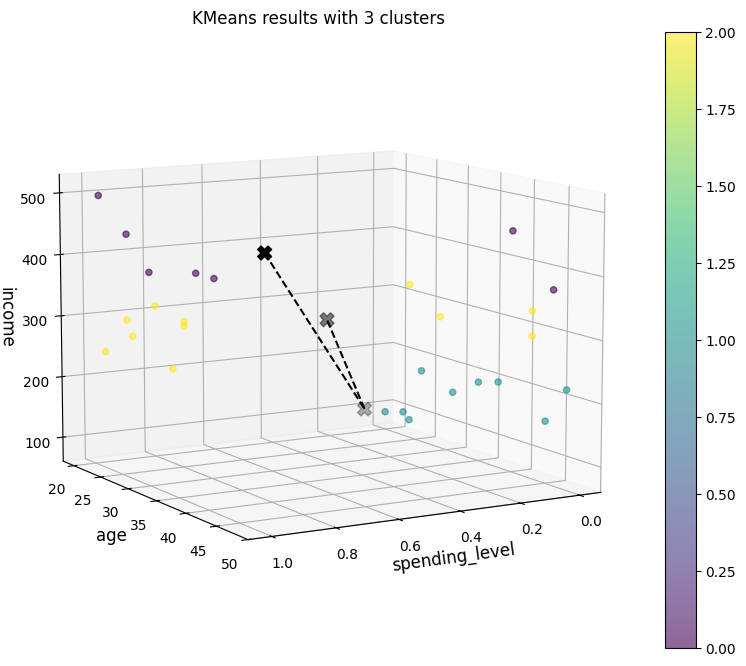

In [47]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df1['spending_level'], df1['age'], df1['income'], c=labels, cmap='viridis', alpha=0.6)
for i in range(len(centroids) - 1):
    ax.plot([centroids[i, 0], centroids[i+1, 0]], 
            [centroids[i, 1], centroids[i+1, 1]], 
            [centroids[i, 2], centroids[i+1, 2]], 
            color='black', linestyle='dashed')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=100, c='black', marker='X')
ax.view_init(elev=10., azim=60)
ax.set_title('KMeans results with 3 clusters', fontsize=12)
ax.set_xlabel('spending_level', fontsize=12)
ax.set_ylabel('age', fontsize=12)
ax.set_zlabel('income', fontsize=12)

plt.colorbar(scatter)
plt.show()

DT

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

In [62]:
df=pd.read_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\final.csv')
df.head()

,gender,age,income,purchase
0,1,30,400,Hardware
1,0,31,350,Skincare
2,1,40,450,Home
3,0,26,180,groceries
4,1,38,200,groceries


In [63]:
df['purchase'] = df['purchase'].replace('Groceries', 'groceries')

In [64]:
high_spending = ['Hardware', 'Skincare']
low_spending = ['groceries', 'Home']

In [65]:
df['spending_level'] = df['purchase'].apply(lambda x: 1 if x in high_spending else 0)

In [66]:
purchase_mapping = {'Hardware': 1, 'Skincare': 2, 'Home': 3, 'groceries': 4}
df['purchase_category'] = df['purchase'].map(purchase_mapping)

In [67]:
df.head()

,gender,age,income,purchase,spending_level,purchase_category
0,1,30,400,Hardware,1,1
1,0,31,350,Skincare,1,2
2,1,40,450,Home,0,3
3,0,26,180,groceries,0,4
4,1,38,200,groceries,0,4


In [68]:
X=df.drop(['purchase','purchase_category'], axis=1)


In [69]:
Y=df['purchase_category']

In [70]:
print(X.shape)
print(Y.shape)

(27, 4)
(27,)


In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [72]:
print(X_train.shape)
print(Y_train.shape)

(18, 4)
(18,)


In [73]:
MyDT = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)


In [74]:
MyDT.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

In [75]:
Y_pred = MyDT.predict(X_test)
print(Y_pred)

[2 4 1 2 1 4 2 3 4]


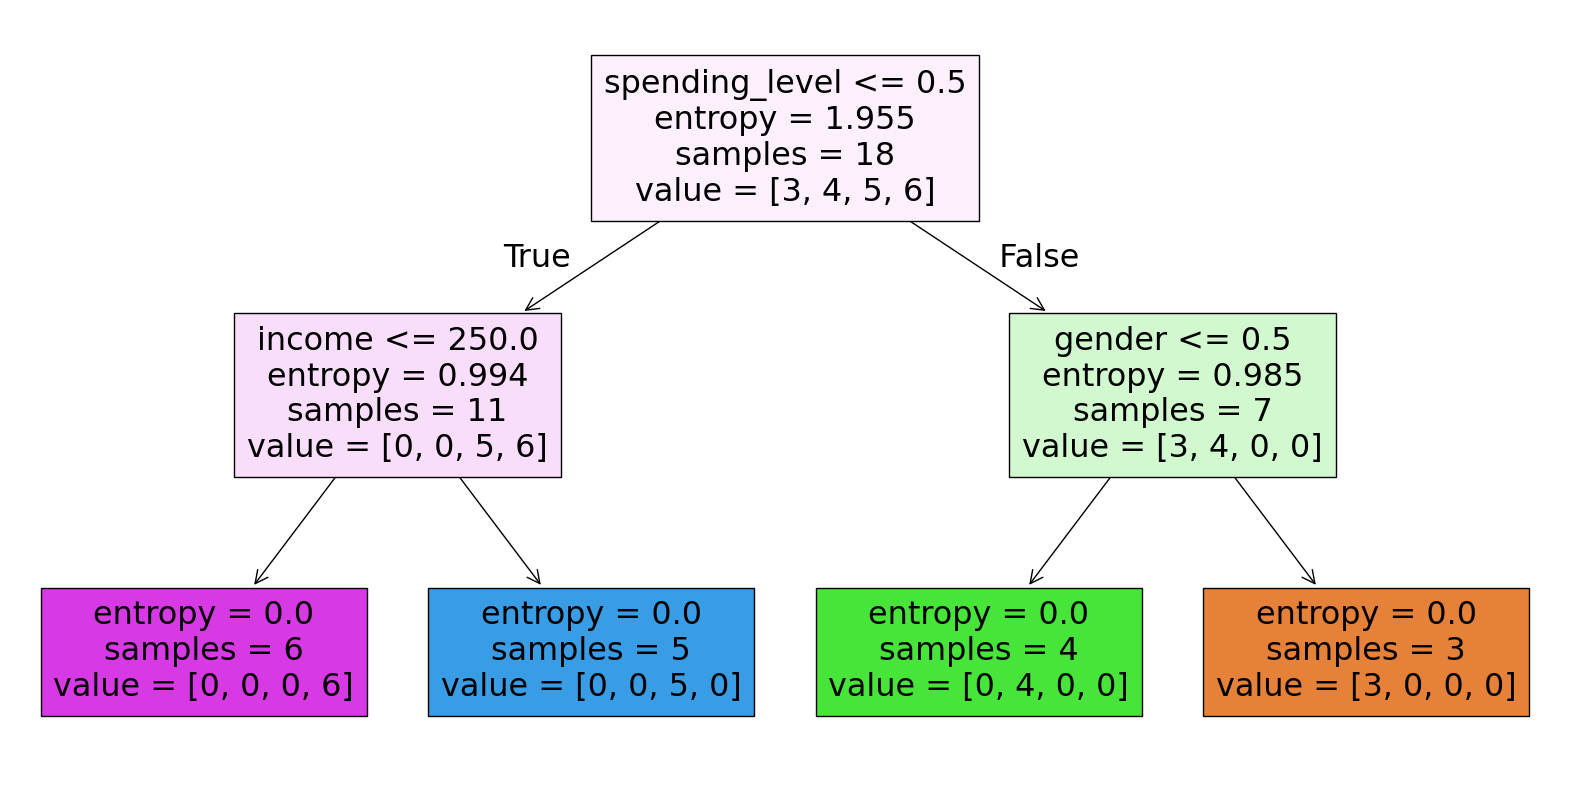

In [76]:
plt.figure(figsize=(20, 10))
tree.plot_tree(MyDT,filled=True, feature_names=df.drop(['purchase','purchase_category'], axis=1).columns)
plt.show()

In [77]:
accuracy = accuracy_score(Y_test,Y_pred )
print("Accuracy:", accuracy)

Accuracy: 1.0


In [78]:
dt_matrix = confusion_matrix(Y_test,Y_pred)
print("\nThe confusion matrix is:")
print(dt_matrix)


The confusion matrix is:
[[2 0 0 0]
 [0 3 0 0]
 [0 0 1 0]
 [0 0 0 3]]


<Axes: >

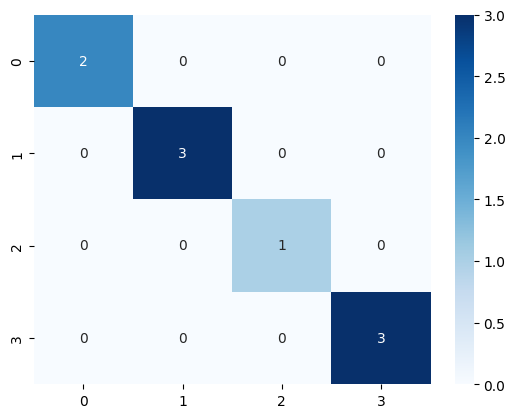

In [79]:
sns.heatmap(dt_matrix, annot=True,fmt='g' , cmap='Blues')

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay

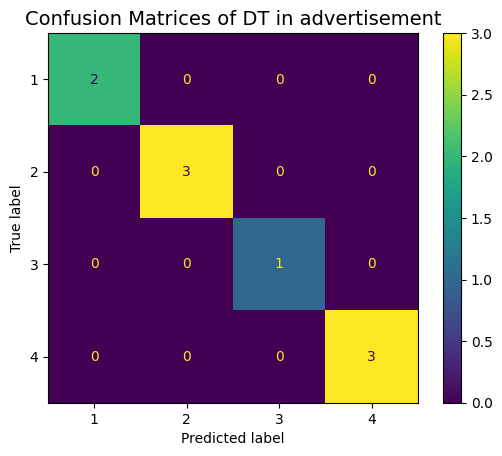

In [84]:
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred)
plt.title('Confusion Matrices of DT in advertisement', fontsize=14)
plt.show()

In [80]:
## Feature Importance
FeatureImpR=MyDT.feature_importances_   
indicesR = np.argsort(FeatureImpR)[::-1]
indicesR
feature_namesR = df.drop(['purchase','purchase_category'], axis=1).columns
print("Feature importances:")
for f in range(len(feature_namesR)):
    print(f"{f + 1}. feature: {feature_namesR[indicesR[f]]} ({FeatureImpR[indicesR[f]]:.4f})")

Feature importances:
1. feature: spending_level (0.4932)
2. feature: income (0.3108)
3. feature: gender (0.1960)
4. feature: age (0.0000)
